* **The given Dataset by codsoft is not available hence using the single character dataset for generating handwritten images**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/english-handwritten-characters-dataset/english.csv
/kaggle/input/english-handwritten-characters-dataset/Img/img040-022.png
/kaggle/input/english-handwritten-characters-dataset/Img/img051-027.png
/kaggle/input/english-handwritten-characters-dataset/Img/img052-009.png
/kaggle/input/english-handwritten-characters-dataset/Img/img052-049.png
/kaggle/input/english-handwritten-characters-dataset/Img/img011-047.png
/kaggle/input/english-handwritten-characters-dataset/Img/img038-026.png
/kaggle/input/english-handwritten-characters-dataset/Img/img021-042.png
/kaggle/input/english-handwritten-characters-dataset/Img/img057-036.png
/kaggle/input/english-handwritten-characters-dataset/Img/img049-009.png
/kaggle/input/english-handwritten-characters-dataset/Img/img023-054.png
/kaggle/input/english-handwritten-characters-dataset/Img/img019-004.png
/kaggle/input/english-handwritten-characters-dataset/Img/img017-016.png
/kaggle/input/english-handwritten-characters-dataset/Img/img036-015.png

# **Importing Libraries**

In [2]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Reshape, Conv2D, BatchNormalization, UpSampling2D

import os
import shutil

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Loading Data**

In [3]:
df= pd.read_csv("/kaggle/input/english-handwritten-characters-dataset/english.csv")

In [4]:
df.sample(2)

,image,label
495,Img/img010-001.png,9
2017,Img/img037-038.png,a


In [5]:
df.isna().sum().sum(),df.duplicated().sum()

(0, 0)

**No null or duplicate values**

In [6]:
df["label"].value_counts()

label
0    55
k    55
X    55
Y    55
Z    55
     ..
P    55
Q    55
R    55
S    55
z    55
Name: count, Length: 62, dtype: int64

**Resizing images to 200x200**

In [ ]:
images = df["image"]
output=[]
for path in images:
    
    image = Image.open("/kaggle/input/english-handwritten-characters-dataset/"+path)
    image = image.convert("L")
    image = image.resize((500,500))
    image = np.array(image)
    output.append(image)

image_data = np.array(output) # Replace with your actual image data
image_data = image_data/255.0

print(image_data.shape)

**Ploting one image for check**

In [ ]:
plt.gray()
plt.imshow(image_data[200])

**Encoding Input Text and converting to sequences**

In [ ]:
text_data = df["label"]

tokenizer = tf.keras.preprocessing.text.Tokenizer(char_level=True,lower=False)
tokenizer.fit_on_texts(text_data)

# Convert text data to sequences
text_sequences = tokenizer.texts_to_sequences(text_data)

# Padding sequences for a consistent input size
max_text_length = max(len(seq) for seq in text_sequences)
padded_text_sequences = tf.keras.preprocessing.sequence.pad_sequences(text_sequences, maxlen=max_text_length)

In [ ]:
len(tokenizer.word_index)

**Input Data contains total of 62 Character and Numbers**
* **a-z : 26**
* **A-Z : 26**
* **0-9 : 10**

# Modelling

* embedding layer for the input of LSTM(RNN)
* LSTM layer for operating on text
* Dense layer of size 400000 as output image is of size 200x200

In [25]:
model = models.Sequential()
model.add(layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50))
model.add(layers.LSTM(1024))
model.add(layers.Dense(500*500, activation='relu'))
model.add(layers.Reshape((500, 500, 1)))  # Assuming your output shape is 50x50
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(np.array(padded_text_sequences), image_data, epochs=300, batch_size=64)

54/54 [==============================] - 3s 55ms/step - loss: 0.0413
Epoch 24/300
54/54 [==============================] - 3s 53ms/step - loss: 0.0413
Epoch 25/300
54/54 [==============================] - 3s 54ms/step - loss: 0.0413
Epoch 26/300
54/54 [==============================] - 3s 53ms/step - loss: 0.0413
Epoch 27/300
54/54 [==============================] - 3s 54ms/step - loss: 0.0413
Epoch 28/300
54/54 [==============================] - 3s 55ms/step - loss: 0.0413
Epoch 29/300
54/54 [==============================] - 3s 55ms/step - loss: 0.0413
Epoch 30/300
54/54 [==============================] - 3s 54ms/step - loss: 0.0413
Epoch 31/300
54/54 [==============================] - 3s 54ms/step - loss: 0.0413
Epoch 32/300
54/54 [==============================] - 3s 54ms/step - loss: 0.0413
Epoch 33/300
54/54 [==============================] - 3s 54ms/step - loss: 0.0413
Epoch 34/300
54/54 [==============================] - 3s 56ms/step - loss: 0.0413
Epoch 35/300
54/54 [=========

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



54/54 [==============================] - 3s 57ms/step - loss: 0.0377
Epoch 118/300
54/54 [==============================] - 3s 54ms/step - loss: 0.0377
Epoch 119/300
54/54 [==============================] - 3s 55ms/step - loss: 0.0376
Epoch 120/300
54/54 [==============================] - 3s 55ms/step - loss: 0.0377
Epoch 121/300
54/54 [==============================] - 3s 56ms/step - loss: 0.0376
Epoch 122/300
54/54 [==============================] - 3s 55ms/step - loss: 0.0377
Epoch 123/300
54/54 [==============================] - 3s 55ms/step - loss: 0.0376
Epoch 124/300
54/54 [==============================] - 3s 55ms/step - loss: 0.0376
Epoch 125/300
54/54 [==============================] - 3s 55ms/step - loss: 0.0376
Epoch 126/300
54/54 [==============================] - 3s 57ms/step - loss: 0.0376
Epoch 127/300
54/54 [==============================] - 3s 55ms/step - loss: 0.0376
Epoch 128/300
54/54 [==============================] - 3s 55ms/step - loss: 0.0376
Epoch 129/300
54/5

In [26]:
def delete_directory(directory_path):
    try:
        # Remove the contents of the directory
        for root, dirs, files in os.walk(directory_path):
            for file in files:
                file_path = os.path.join(root, file)
                os.remove(file_path)
            for dir in dirs:
                dir_path = os.path.join(root, dir)
                os.rmdir(dir_path)

        # Now, remove the empty directory
        shutil.rmtree(directory_path)

        print(f"Directory '{directory_path}' already exists, '{directory_path}' deleted successfully.")
    except Exception as e:
            print("does not exists")


**Creating Directory for storing Predicted Images**

**making white image if there is spaces in the input text**

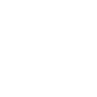

In [30]:
white_image = np.ones((500, 500)) * 255
fig,ax = plt.subplots(figsize = (1,1))
plt.axis('off')
plt.imshow(white_image,cmap='gray', vmin=0, vmax=255)
plt.show()

**Function for cropping and merging single images and making a full image**

In [197]:
def get_out_image(text="Sample",figsize=(10,6),crop_size=(250,500)):
    
    mystr = text
    textlist = list(mystr)

    predicted_images=[]

    for new_text in textlist:
        if (new_text==" "):
            white_image = np.ones((500, 500))*249
            predicted_images.append(white_image)
        else:
            new_text_sequence = tokenizer.texts_to_sequences([new_text])
            predicted_image = model.predict(np.array(new_text_sequence),verbose=5)[0]
            predicted_image = predicted_image.reshape(500,500)
            predicted_images.append(predicted_image)

    directory_path = 'out_images'
    delete_directory(directory_path)

    import os
    os.mkdir("out_images")

    predicted_images = np.array(predicted_images)

    for new_text,image in zip(textlist,predicted_images):
        image_path = f"out_images/{new_text}.png"
        fig = plt.figure(figsize=(5,5))
        if (new_text==" "):
            fig.figimage(image,vmin=0,vmax=255)
        else:
            fig.figimage(image)
        plt.savefig(image_path)
        plt.close(fig)


    def center_crop(image, target_size):
        width, height = image.size
        left = (width - target_size[0]) // 2
        top = (height - target_size[1]) // 2
        right = (width + target_size[0]) // 2
        bottom = (height + target_size[1]) // 2
        return image.crop((left, top, right, bottom))

    def merge_images(image_list):
        # Assuming all images have the same size
        image_size = image_list[0].size
        merged_image = np.zeros((image_size[1], len(image_list) * image_size[0]))

        for i, image in enumerate(image_list):
            merged_image[:, i * image_size[0] : (i + 1) * image_size[0]] = np.array(image)

        return merged_image

    # Load images and center crop
    images = []
    for char in textlist:
        # Load image (replace 'path_to_images' with the actual path)
        image_path = f"out_images/{char}.png"
        img = Image.open(image_path).convert("L")  # Convert to grayscale
        cropped_img = center_crop(img, target_size=crop_size)  # Adjust the target size as needed
        images.append(cropped_img)

    # Merge images into a single numpy array
    merged_image_array = merge_images(images)

    # Display the thresholded merged image
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(merged_image_array, cmap="gray",vmin=0, vmax=255)
    ax.axis("off")
    plt.show()

# **Predicting Output**

Directory 'out_images' already exists, 'out_images' deleted successfully.


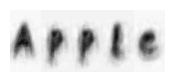

In [205]:
get_out_image("Apple",figsize=(2,3))

Directory 'out_images' already exists, 'out_images' deleted successfully.


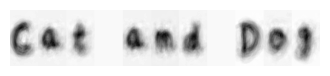

In [202]:
get_out_image("Cat and Dog",figsize=(4,5))

Directory 'out_images' already exists, 'out_images' deleted successfully.


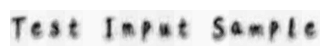

In [201]:
get_out_image("Test Input Sample",figsize=(4,5))

# **Conclusion**

**Tried to apply the same model on full words dataset but loss was not reducing so i used this model**
* **this dataset contains single characters photos data**
* **i trained a model which takes one character as input and predicts single character output**
* **so first the string is splitted into single characters and then it is sent to the model and model gives single photos as output,now i am merging all the output photos and showing the merged photo.**